Linear Regression MSE: 125.64338251957679
Linear Regression R²: 0.8510436933807929


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network MSE: 0.6276234181945517
Neural Network R²: 0.999255922083223


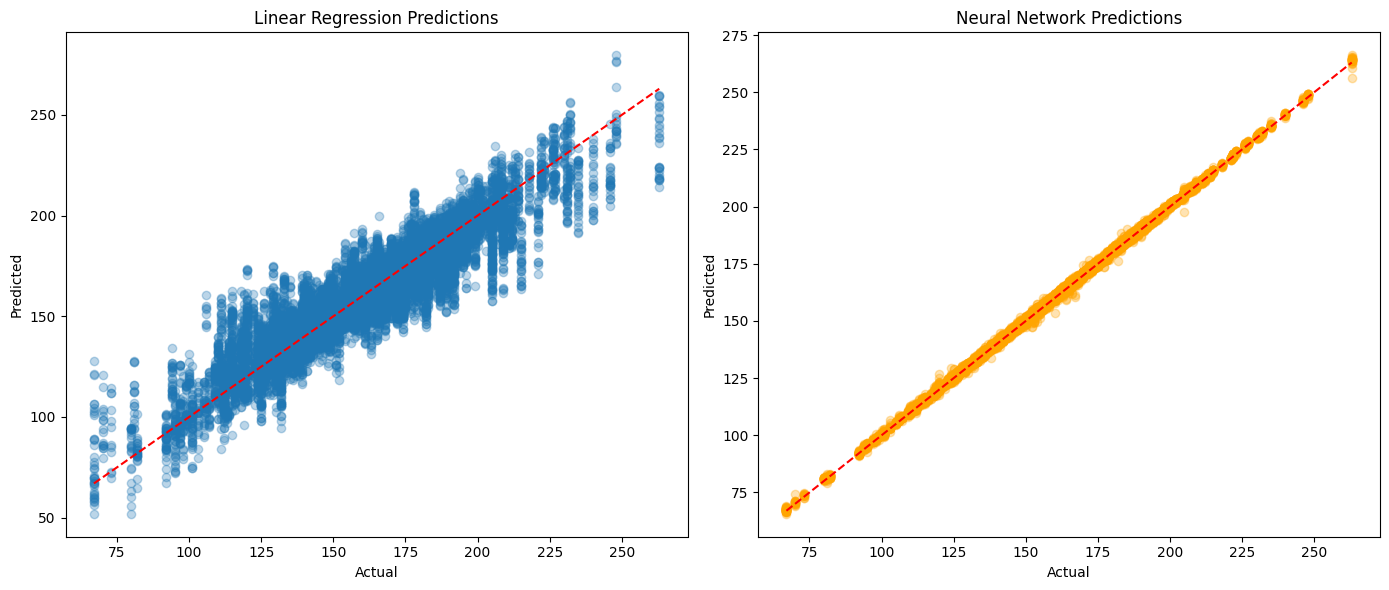

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('ipl_data.csv')

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns

# Convert date columns to numerical format if they exist
if 'Date' in non_numeric_columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = data['Date'].astype('int64') // 10**9  # Convert to UNIX timestamp
    non_numeric_columns = non_numeric_columns.drop('Date')

# Encode categorical columns
data = pd.get_dummies(data, columns=non_numeric_columns)

# Separate features and target variable
target_column = 'total'  # Replace with your actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R²: {r2_lr}')

# Train the neural network model
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network R²: {r2_nn}')

import matplotlib.pyplot as plt

# Scatter plot for Linear Regression predictions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')

# Scatter plot for Neural Network predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn, alpha=0.3, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network Predictions')

plt.tight_layout()
plt.show()
